In [66]:
import pandas as pd
from pandas import read_csv
crimes = read_csv('crimes-in-chicago/Chicago_Crimes_2012_to_2017.csv', index_col='Date')

In [67]:
print(type(crimes)) # have to find most trending crimes which will be used in previous analysis

<class 'pandas.core.frame.DataFrame'>


In [68]:
crimes = crimes.iloc[:, 3: ]
crimes.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,
05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [69]:
s = crimes[['Primary Type']] # primary type wrt date timestamps

In [70]:
s.head()

,Primary Type
Date,
05/03/2016 11:40:00 PM,BATTERY
05/03/2016 09:40:00 PM,BATTERY
05/03/2016 11:31:00 PM,PUBLIC PEACE VIOLATION
05/03/2016 10:10:00 PM,BATTERY
05/03/2016 10:00:00 PM,THEFT


grouping by primary type for finding the counts

In [71]:
crime_count = pd.DataFrame(s.groupby('Primary Type').size().sort_values(ascending=False).rename('counts').reset_index())

In [72]:
crime_count.head()

,Primary Type,counts
0,THEFT,329460
1,BATTERY,263700
2,CRIMINAL DAMAGE,155455
3,NARCOTICS,135240
4,ASSAULT,91289


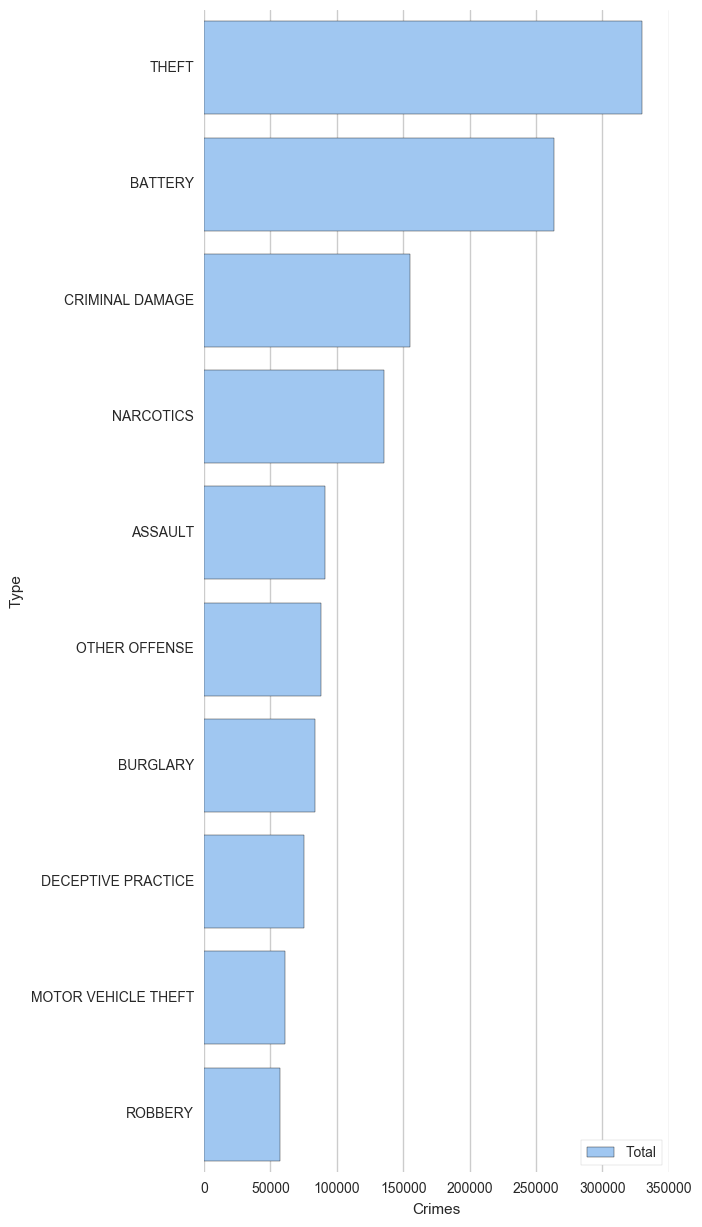

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplots
f, ax = plt.subplots(figsize=(6, 15))


# Plot the total outcomes
sns.set_color_codes("pastel")
sns.barplot(x="counts", y="Primary Type", data=crime_count.iloc[:10, :],
            label="Total", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type",
       xlabel="Crimes")
sns.despine(left=True, bottom=True)


plt.show()